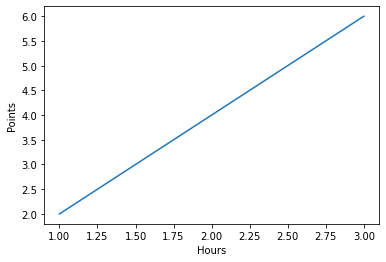

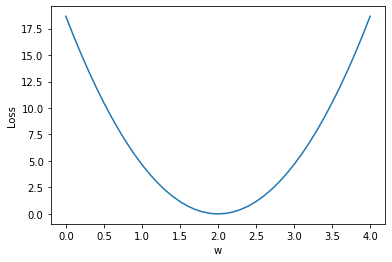

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data= [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

plt.plot(x_data, y_data)
plt.xlabel('Hours')
plt.ylabel('Points')
plt.show()

w = 1.0

def forward(x):
    return x * w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y )**2


# mse가 w값에 따라 어떻게 변하는지

w_list=[]
mse_list=[]
for w in np.arange(0.0, 4.1, 0.1): #0~4까지 0.1씩 바꿔가며 반복문 실행
    # print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        # print("\t", x_val, y_val, y_pred_val, l)
    
    w_list.append(w)
    mse_list.append(l_sum/3)
    # print("MSE = ", l_sum/3)

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

# 보스턴 집값 예측하는데 활용

      RM  Price
0  6.575   24.0
1  6.421   21.6
2  7.185   34.7
3  6.998   33.4
4  7.147   36.2
5  6.430   28.7
6  6.012   22.9
7  6.172   27.1
8  5.631   16.5
9  6.004   18.9


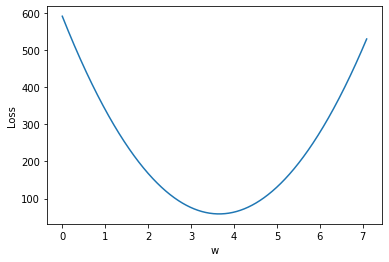

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

boston_house_prices = datasets.load_boston()
df = pd.DataFrame(boston_house_prices.data) #설명변수 할당
df.columns = boston_house_prices.feature_names
df['Price'] = boston_house_prices.target #종속변수 할당
target_df = df[['RM','Price']]
print(target_df.head(10))

def forward(x):
    return x * w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y )**2

# mse가 w값에 따라 어떻게 변하는지
w_list=[]
mse_list=[]
for w in np.arange(0.0, 7.1, 0.01): #0~7까지 0.01씩 바꿔가며 반복문 실행
    # print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(df['RM'], df['Price']):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        # print("\t", x_val, y_val, y_pred_val, l)
    
    w_list.append(w)
    mse_list.append(l_sum/len(df['Price'])) # MSE 계산하기 위해, 데이터 개수만큼 loss합에서 나눠줌

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

# gradient 업데이트 예제1

- 가중치 1개 업데이트

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w=1.0

def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y )**2

#compute gradient
def gradient(x,y):
    return 2 * x * (x*w-y)

for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad #gradient descent
        print('\tgrad: ', x_val, y_val, grad)
        l = loss(x_val, y_val)
    
    print("progress:", epoch, "w=",w, "loss=", l)

print("predict (after training", "4 hours", forward(4))

	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:  1.0 2.0 -0.3265852213980338
	grad:  2.0 4.0 -1.2802140678802925
	grad

# gradient 업데이트 예제2

- 가중치 2개 업데이트

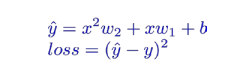

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = [1, 2, 3]
y_data = [2, 4, 6]

w1= 1.0
w2 = 1.0
b = 1

def forward(x):
    return x*x*w2 + x*w1 + b

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y )**2

#compute gradient
def gradient_w1(x,y):
    return 2 * (x*x*w2 + x*w1 + b - y) * (x)

def gradient_w2(x,y):
    return 2 * (x*x*w2 + x*w1 + b - y) * (x*x)

for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        grad1 = gradient_w1(x_val, y_val)
        grad2 = gradient_w2(x_val, y_val)
        w1 = w1 - 0.01 * grad1 #gradient descent
        w2 = w2 - 0.01 * grad2 #gradient descent
        print('\tgrad: ', x_val, y_val, grad1, grad2)
        l = loss(x_val, y_val)
    
    print("progress:", epoch, "w1=",w1,"w2=",w2, "loss=", l)

print("predict (after training", "4 hours", forward(4))

	grad:  1 2 2.0 2.0
	grad:  2 4 11.52 23.04
	grad:  3 6 26.04480000000001 78.13440000000003
progress: 0 w1= 0.6043519999999999 w2= -0.031744000000000216 loss= 12.059228569600016
	grad:  1 2 -0.8547840000000004 -0.8547840000000004
	grad:  2 4 -7.467939840000003 -14.935879680000006
	grad:  3 6 -10.810791321600007 -32.43237396480002
progress: 1 w1= 0.795687151616 w2= 0.45048637644800005 loss= 2.077745937763234
	grad:  1 2 0.49234705612800056 0.49234705612800056
	grad:  2 4 1.4551159426252802 2.9102318852505604
	grad:  3 6 6.460697089159993 19.38209126747998
progress: 2 w1= 0.7116055507368673 w2= 0.22263967435941467 loss= 0.7420552333845415
	grad:  1 2 -0.13150954980743634 -0.13150954980743634
	grad:  2 4 -2.7133585124006423 -5.426717024801285
	grad:  3 6 -1.655039069841834 -4.965117209525502
progress: 3 w1= 0.7566046220573664 w2= 0.3278731122007569 loss= 0.04869607684805228
	grad:  1 2 0.16895546851624665 0.16895546851624665
	grad:  2 4 -0.741742540772858 -1.483485081545716
	grad:  3 6 2.